# AI Bauchi 6 Weeks Computer Vision Bootcamp

## Week 3.4: Deep Learning Basics for Computer Vision
Transfer Learning



## **1. Introduction to Transfer Learning**

### **What is Transfer Learning?**

#### **Definition and Concept**
Transfer Learning is a machine learning technique where a model developed for one task is reused as the starting point for a model on a second, related task. It leverages the knowledge gained while solving one problem and applies it to a different but related problem. The concept is akin to the way humans transfer knowledge from one domain to another.

Transfer learning is about leveraging feature representations from a pre-trained model, so you don’t have to train a new model from scratch. 

The pre-trained models are usually trained on massive datasets that are a standard benchmark in the computer vision frontier. The weights obtained from the models can be reused in other computer vision tasks. 

These models can be used directly in making predictions on new tasks or integrated into the process of training a new model. Including the pre-trained models in a new model leads to lower training time and lower generalization error.  

Transfer learning is particularly very useful when you have a small training dataset. In this case, you can, for example, use the weights from the pre-trained models to initialize the weights of the new model. As you will see later, transfer learning can also be applied to natural language processing problems. 

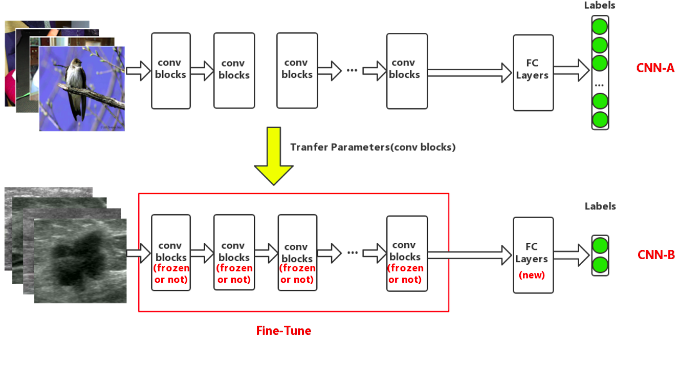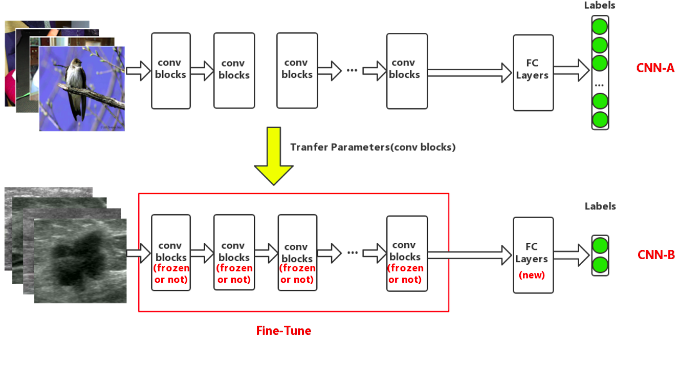


#### **Advantages and Applications**
- **Reduced Training Time**: Leveraging pre-trained models can significantly reduce the time required to train a new model from scratch, especially with large datasets.
- **Improved Performance**: Transfer Learning can lead to better performance when dealing with limited data, as the model benefits from the knowledge learned from large datasets used in pre-training.
- **Lower Resource Requirements**: Reduces the need for extensive computational resources, making it accessible for tasks with limited infrastructure.
- **Broad Applicability**: Applicable in various domains, such as computer vision, natural language processing, speech recognition, and more.

### **When to Use Transfer Learning?**

#### **Scenarios Where It Is Beneficial**
- **Insufficient Training Data**: When the available dataset is too small to train a model from scratch effectively.
- **Limited Computational Resources**: When there is a need to train models efficiently with constrained resources.
- **Domain Similarity**: When the source and target tasks are similar, such as using a pre-trained image recognition model on a new but similar image dataset.
- **Speeding Up Development**: When a quick solution is needed, transfer learning can provide a faster path to deployment.

---


### When Does Transfer Learning Not Work?

Transfer learning can be an incredibly powerful technique, but there are certain situations where it may not yield the desired results. Let's explore some scenarios where transfer learning might fail or require significant adjustments.

#### 1. **Inadequate High-Level Features**

Transfer learning may not work when the high-level features learned by the bottom layers of the pre-trained model are not sufficient to differentiate the classes in your specific problem. For instance, consider a pre-trained model that is excellent at identifying doors. However, if your task requires distinguishing between open and closed doors, the model's high-level features may not be detailed enough for this differentiation. In such cases, the model might not capture the nuances needed for the new task.

##### Solution:
- **Use Low-Level Features:** You can opt to use the low-level features learned by the earlier layers of the pre-trained network, as these might capture more detailed information.
- **Retrain More Layers:** You may need to retrain additional layers of the model or use features from earlier layers to better capture the specifics of your problem.

#### 2. **Dissimilar Datasets**

Transfer learning often relies on the similarity between the source and target datasets. When the datasets are not similar, the features learned from the source dataset may transfer poorly to the target dataset. For example, a model trained on ImageNet might not perform well on a medical imaging dataset without significant adjustments.

##### Key Points:
- **Feature Mismatch:** The features learned from the source dataset may not be relevant or sufficient for the target dataset.
- **Research Insight:** Studies have shown that initializing a network with pre-trained weights generally leads to better performance than starting with random weights, even when the datasets are not very similar. However, the degree of improvement varies based on dataset similarity.

#### 3. **Removing Layers from Pre-trained Models**

In some situations, you might consider removing some layers from the pre-trained model, either to reduce computational costs or because the removed layers are not needed for the new task. However, this approach can lead to problems.

##### Potential Issues:
- **Reduced Trainable Parameters:** Removing layers decreases the number of trainable parameters, which can limit the model's capacity to learn and adapt to the new task.
- **Overfitting:** A reduced number of parameters can lead to overfitting, especially if the model becomes too simplistic for the complexity of the new task.
- **Cumbersome Tuning:** Determining the optimal number of layers to remove without sacrificing performance can be a cumbersome and time-consuming process.


### Freezing Layers: Understanding the Trainable Attribute

In Keras, layers and models have three key weight attributes:

- **`weights`**: A list of all weight variables in the layer.
- **`trainable_weights`**: A list of weights that are updated during training to minimize the loss via gradient descent.
- **`non_trainable_weights`**: A list of weights not meant to be trained, usually updated during the forward pass.

For instance, a Dense layer has two trainable weights (kernel & bias):


In [1]:
layer = keras.layers.Dense(3)
layer.build((None, 4))  # Create the weights

print("weights:", len(layer.weights))
print("trainable_weights:", len(layer.trainable_weights))
print("non_trainable_weights:", len(layer.non_trainable_weights))
# Output: weights: 2, trainable_weights: 2, non_trainable_weights: 0

NameError: name 'keras' is not defined


Typically, all weights are trainable except for the `BatchNormalization` layer, which includes two non-trainable weights to track input mean and variance during training. Here's an example:


In [ ]:
layer = keras.layers.BatchNormalization()
layer.build((None, 4))  # Create the weights

print("weights:", len(layer.weights))
print("trainable_weights:", len(layer.trainable_weights))
print("non_trainable_weights:", len(layer.non_trainable_weights))


### Freezing Layers with the Trainable Attribute

Layers and models have a boolean attribute `trainable`. Setting `layer.trainable = False` moves all the layer's weights from trainable to non-trainable, effectively "freezing" the layer. For example:


In [ ]:
layer = keras.layers.Dense(3)
layer.build((None, 4))  # Create the weights
layer.trainable = False  # Freeze the layer

print("weights:", len(layer.weights))
print("trainable_weights:", len(layer.trainable_weights))
print("non_trainable_weights:", len(layer.non_trainable_weights))
# Output: weights: 2, trainable_weights: 0, non_trainable_weights: 2


When a weight becomes non-trainable, it is not updated during training.
#### Example of Freezing and Training a Model


In [ ]:
layer1 = keras.layers.Dense(3, activation="relu")
layer2 = keras.layers.Dense(3, activation="sigmoid")
model = keras.Sequential([keras.Input(shape=(3,)), layer1, layer2])

# Freeze the first layer
layer1.trainable = False

# Save the initial weights of the frozen layer
initial_layer1_weights_values = layer1.get_weights()

# Compile and train the model
model.compile(optimizer="adam", loss="mse")
model.fit(np.random.random((2, 3)), np.random.random((2, 3)))

# Check if the weights of layer1 have not changed
final_layer1_weights_values = layer1.get_weights()
np.testing.assert_allclose(
    initial_layer1_weights_values[0], final_layer1_weights_values[0]
)
np.testing.assert_allclose(
    initial_layer1_weights_values[1], final_layer1_weights_values[1]
)

### Recursive Setting of the Trainable Attribute

Setting `trainable = False` on a model or layer with sublayers makes all its children layers non-trainable as well.


In [ ]:
inner_model = keras.Sequential([
    keras.Input(shape=(3,)),
    keras.layers.Dense(3, activation="relu"),
    keras.layers.Dense(3, activation="relu"),
])

model = keras.Sequential([
    keras.Input(shape=(3,)),
    inner_model,
    keras.layers.Dense(3, activation="sigmoid"),
])

model.trainable = False  # Freeze the entire model

assert not inner_model.trainable
assert not inner_model.layers[0].trainable  # trainable is recursively set


### Transfer Learning Workflow

1. **Instantiate a base model** and load pre-trained weights.
2. **Freeze all layers** in the base model by setting `trainable = False`.
3. **Create a new model** on top of the base model's output.
4. **Train the new model** on your dataset.

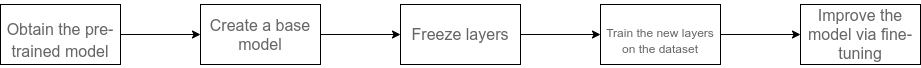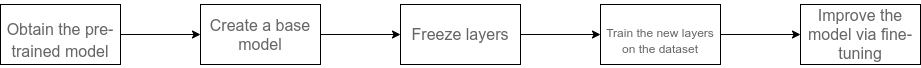

#### Example: Transfer Learning with Keras


In [ ]:
base_model = keras.applications.Xception(
    weights='imagenet',  # Pre-trained on ImageNet
    input_shape=(150, 150, 3),
    include_top=False  # Exclude the ImageNet classifier
)
base_model.trainable = False  # Freeze the base model

inputs = keras.Input(shape=(150, 150, 3))
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])
model.fit(new_dataset, epochs=20, callbacks=..., validation_data=...)

### Fine-Tuning

After the initial training, you can unfreeze the base model (or parts of it) and retrain the entire model with a low learning rate. This step should only be done after the model with frozen layers has converged.


In [ ]:
base_model.trainable = True  # Unfreeze the base model

model.compile(optimizer=keras.optimizers.Adam(1e-5),  # Very low learning rate
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])

model.fit(new_dataset, epochs=10, callbacks=..., validation_data=...)




**Important Notes:**
- **BatchNormalization Layers**: Keep them in inference mode during fine-tuning by setting `training=False` to avoid destabilizing learned features.
- **Recompile the Model**: Always recompile the model after changing the `trainable` attribute to ensure the changes are accounted for.